# Bank account churn prediction

## Exploratory Data Analysis

In [1]:
# import some useful libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# obtain the dataset using Kaggle's api
! kaggle datasets download -d shrutimechlearn/churn-modelling && unzip -o churn-modelling.zip

churn-modelling.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  churn-modelling.zip
  inflating: Churn_Modelling.csv     


In [3]:
# create a dataframe from the csv file and take a look at the data types and labels
churn_df = pd.read_csv('Churn_Modelling.csv', index_col=0)
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
# this is what we want to predict
target = churn_df.Exited

# drop columns that don't seem useful from our dataframe of features
feats = churn_df.copy()
drop_columns = ['CustomerId', 'Surname', 'Exited']
columns = churn_df.columns
drop_columns = set(columns) & set(drop_columns)
feats.drop(columns=drop_columns, inplace=True)
feats.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
3,502,France,Female,42,8,159660.80,3,1,0,113931.57
4,699,France,Female,39,1,0.00,2,0,0,93826.63
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
# create dummy variables to transform gender and location from categorical to binary
gender = pd.get_dummies(feats.Gender)
geog = pd.get_dummies(feats.Geography)
X = pd.concat([feats, gender, geog, target], 1).drop(['Geography', 'Gender'], 1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany,Spain,Exited
RowNumber,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0,1
2,608,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0,1
4,699,39,1,0.00,2,0,0,93826.63,1,0,1,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,1,0,0,0,1,0


In [6]:
# output our final dataset of predictors to disk for use in the modeling notebook
#X.to_csv('cleaned_data.csv')

In [7]:
# center and scale non-binary features for consistent analysis
scaler = StandardScaler()
scalable = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
X[scalable] = scaler.fit_transform(X[scalable])
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female,Male,France,Germany,Spain,Exited
RowNumber,,,,,,,,,,,,,,
1,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,1,0,0,1
2,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,1,0,0,0,1,0
3,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,1,0,0,1
4,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,1,0,1,0,0,0
5,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,1,0,0,0,1,0


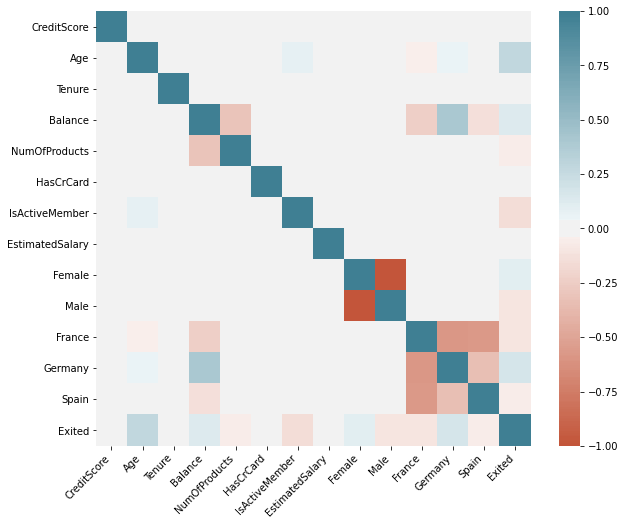

In [8]:
# create a correlation matrix with seaborn to see correlations of features with the target
corr = pd.concat([X.drop('Exited', 1), target], axis=1).corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

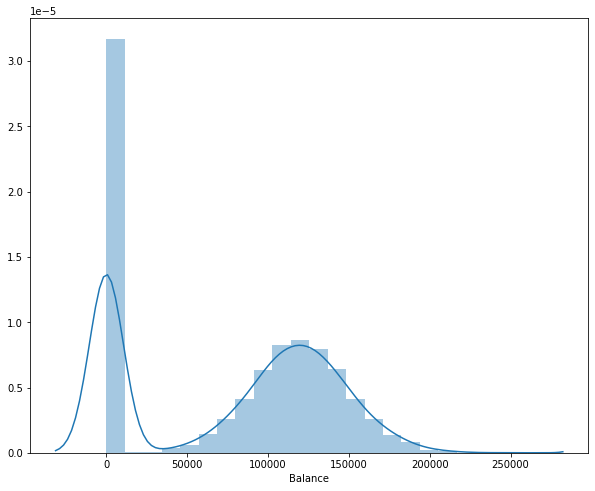

In [9]:
# distribution plots of unscaled data to see what the features look like
sns.distplot(feats.Balance)

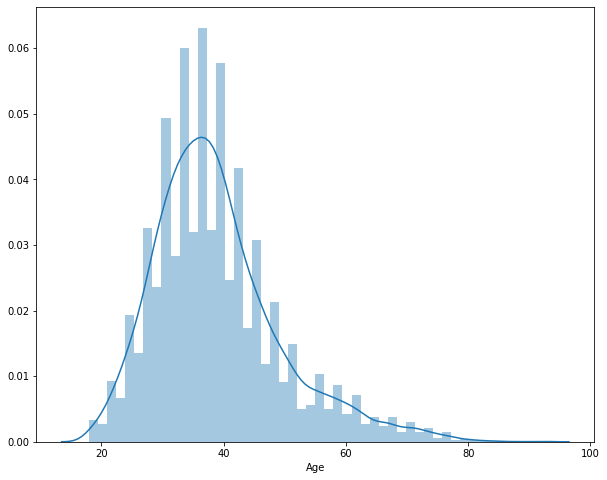

In [10]:
# distribution plots of unscaled data to see what the features look like
sns.distplot(feats.Age)

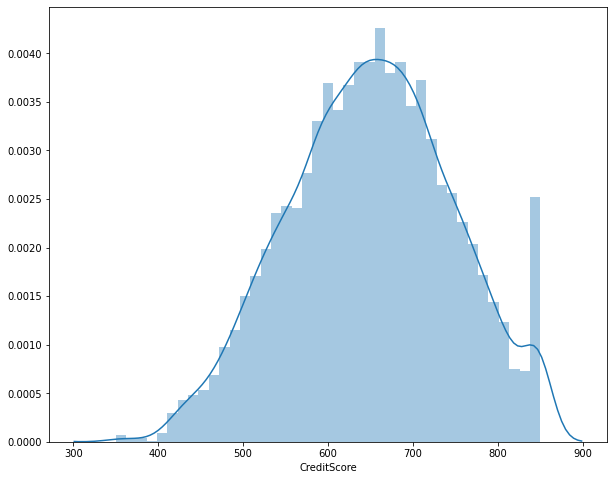

In [11]:
# distribution plots of unscaled data to see what the features look like
sns.distplot(feats.CreditScore)

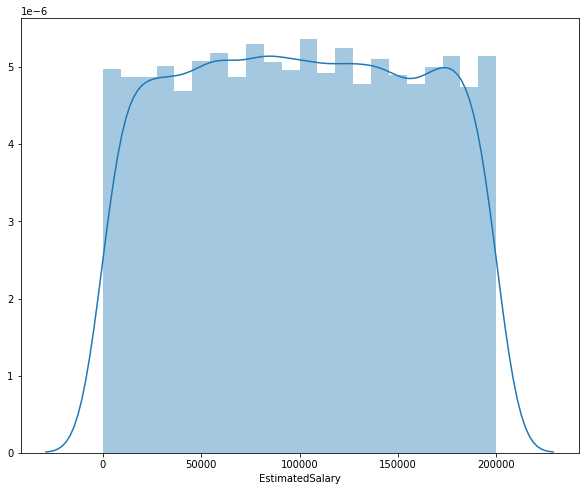

In [12]:
# distribution plots of unscaled data to see what the features look like
sns.distplot(feats.EstimatedSalary)

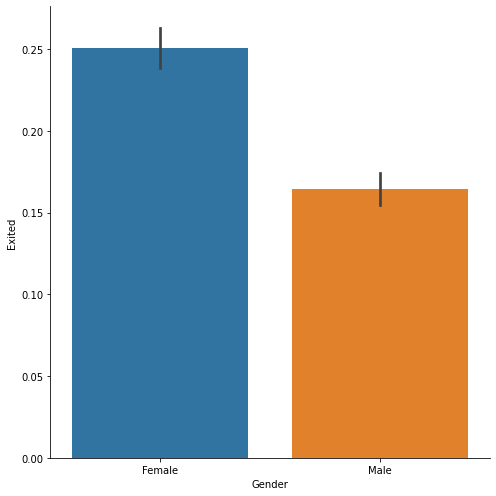

In [13]:
# category plot of target separated by gender
sns.catplot(x = 'Gender', y = 'Exited', data = churn_df, kind = "bar", height = 7)

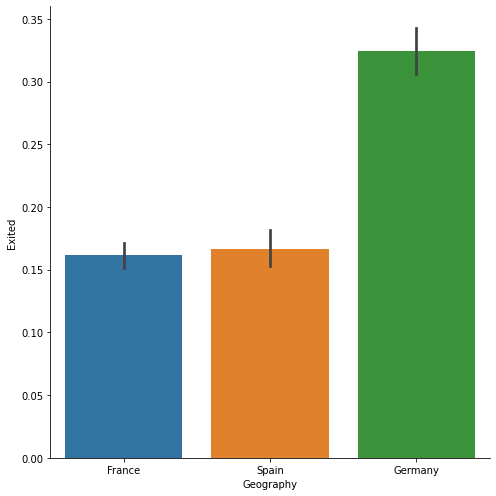

In [14]:
# category plot of target separated by location
sns.catplot(x = 'Geography', y = 'Exited', data = churn_df, kind = "bar", height = 7)

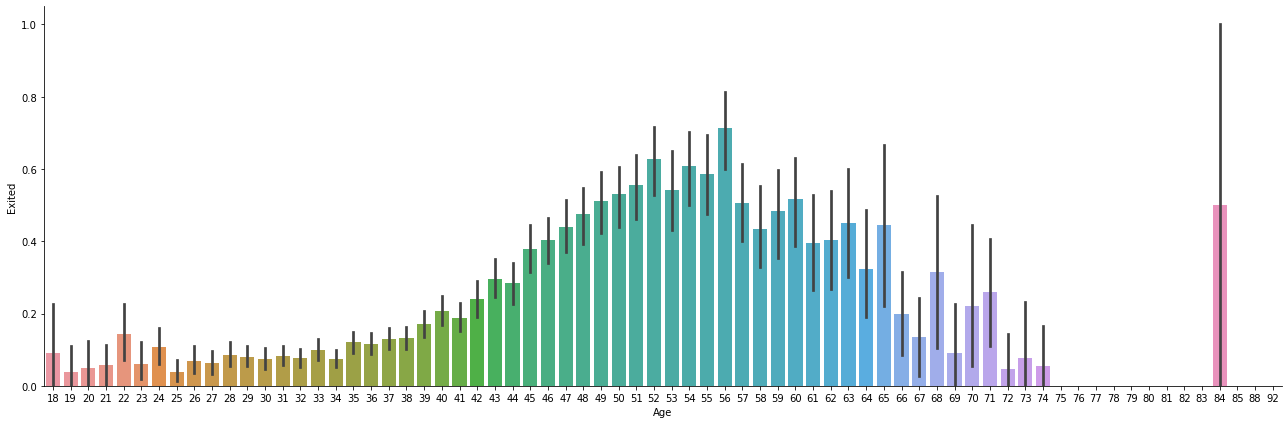

In [15]:
# category plot of target separated by age group
sns.catplot(x = 'Age', y = 'Exited', data = churn_df, kind = "bar", height = 6, aspect=3)

In [16]:
# explained variance plot to investigate efficacy of principal component analysis
import plotly.express as px
pca = PCA()
pca.fit(X)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

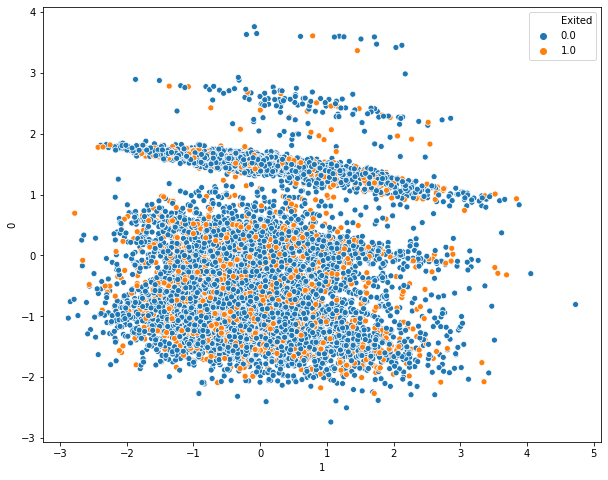

In [17]:
# scatter plot of customers on the plane of the first two principal components, separated by target category
pca = PCA(n_components=2)
components = pd.DataFrame(pca.fit_transform(X))
sns.scatterplot(components.iloc[:,1],components.iloc[:,0], hue=target)